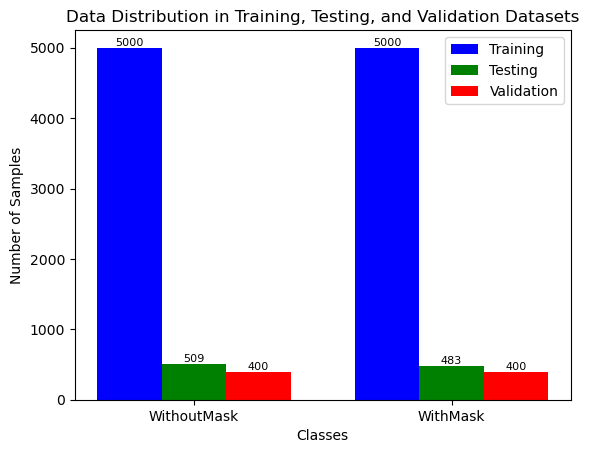

In [3]:
from keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Function to count samples in each class of a directory
def count_samples_in_directory(directory):
    class_counts = defaultdict(int)
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Function to plot data distribution
def plot_data_distribution(dataset_directory):
    train_directory = os.path.join(dataset_directory, 'train')
    test_directory = os.path.join(dataset_directory, 'test')
    val_directory = os.path.join(dataset_directory, 'Validation')

    train_data = count_samples_in_directory(train_directory)
    test_data = count_samples_in_directory(test_directory)
    val_data = count_samples_in_directory(val_directory)

    class_labels = list(set(train_data.keys()) | set(test_data.keys()) | set(val_data.keys()))

    # Bar chart
    bar_width = 0.25
    index = range(len(class_labels))

    plt.bar(index, [train_data[label] for label in class_labels], color='b', width=bar_width, label='Training')
    plt.bar([i + bar_width for i in index], [test_data[label] for label in class_labels], color='g', width=bar_width, label='Testing')
    plt.bar([i + 2 * bar_width for i in index], [val_data[label] for label in class_labels], color='r', width=bar_width, label='Validation')

    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Data Distribution in Training, Testing, and Validation Datasets')
    plt.xticks([i + bar_width for i in index], class_labels)
    plt.legend()
    for i, label in enumerate(class_labels):
        plt.text(i, train_data[label], str(train_data[label]), ha='center', va='bottom', color='black', fontsize=8)
        plt.text(i + bar_width, test_data[label], str(test_data[label]), ha='center', va='bottom', color='black', fontsize=8)
        plt.text(i + 2 * bar_width, val_data[label], str(val_data[label]), ha='center', va='bottom', color='black', fontsize=8)


    plt.show()

# Plot data distribution for the face mask dataset
dataset_directory = 'E:/FaceMaskProject/Face Mask Dataset'
plot_data_distribution(dataset_directory)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0

In [6]:
img_width, img_height = 128, 128
batch_size = 32

# Use ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_directory, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_directory, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_directory, 'Validation'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
history=model.fit(train_generator,
                  steps_per_epoch =train_generator.samples // batch_size ,
                  epochs = 2,
                  validation_data=val_generator, 
                  validation_steps=val_generator.samples// batch_size)

Epoch 1/2
312/312 [==============================] - 361s 1s/step - loss: 0.1721 - accuracy: 0.9341 - val_loss: 0.0656 - val_accuracy: 0.9787
Epoch 2/2
312/312 [==============================] - 320s 1s/step - loss: 0.0726 - accuracy: 0.9737 - val_loss: 0.0498 - val_accuracy: 0.9850


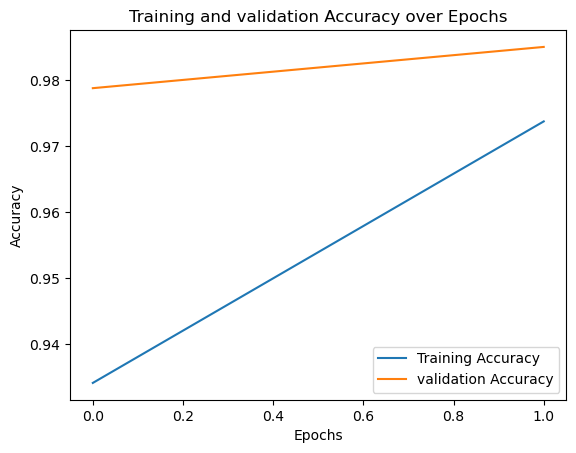

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation Accuracy over Epochs')
plt.legend()
plt.show()

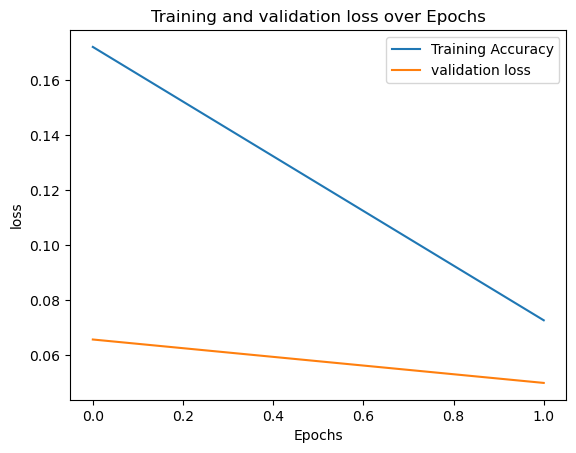

In [11]:
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')  
plt.title('Training and validation loss over Epochs')
plt.legend()
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

31/31 [==============================] - 13s 410ms/step - loss: 0.0687 - accuracy: 0.9758
Test Accuracy: 0.975806474685669
Test Loss: 0.06865831464529037


1/1 [==============================] - 0s 284ms/step


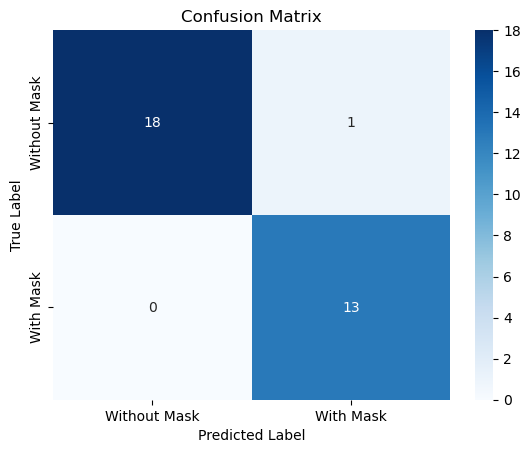

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the test data and labels
test_data, test_labels = next(test_generator)

# Predict labels using the trained model
predictions = model.predict(test_data)
predicted_labels = np.round(predictions).flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Without Mask', 'With Mask'], yticklabels=['Without Mask', 'With Mask'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


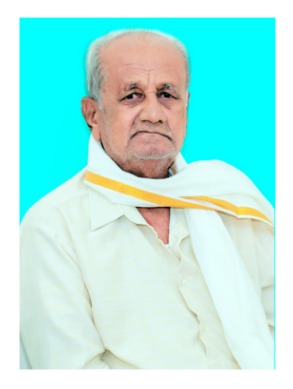

1/1 [==============================] - 0s 19ms/step
[[0.]]
withoutMask


In [16]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
image_path = 'E:/apporu.png'
test_image =image.load_img(image_path,target_size = (128, 128))

import matplotlib.pyplot as plt
from PIL import Image

image_data = plt.imread(image_path)

# Display the image
plt.imshow(image_data)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print(result)
if result !=0:
  print('withtMask')
else:
  print('withoutMask')

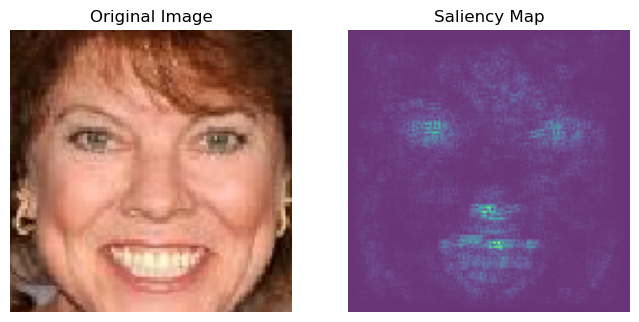

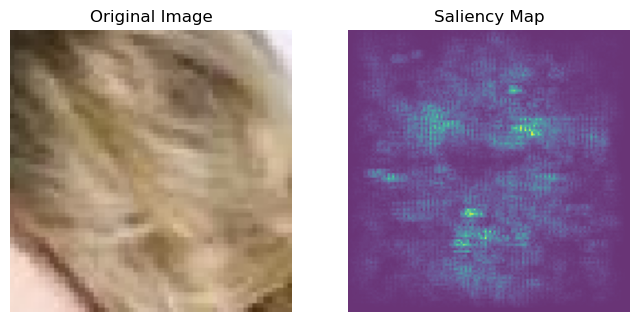

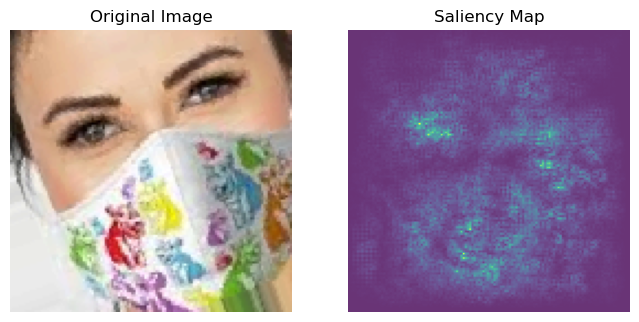

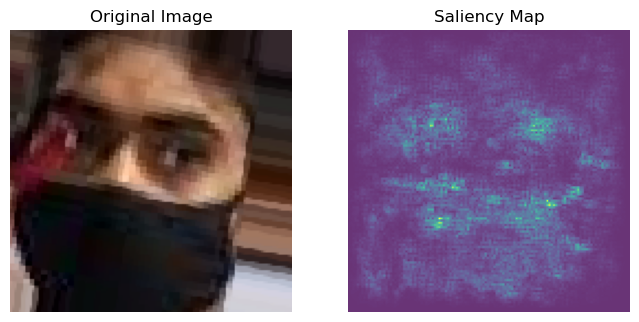

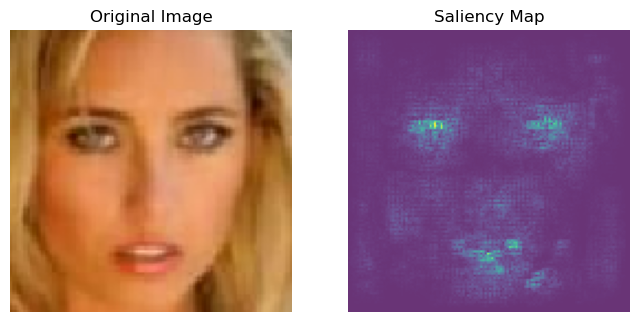

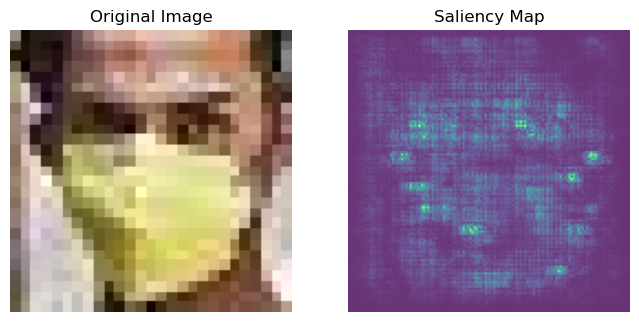

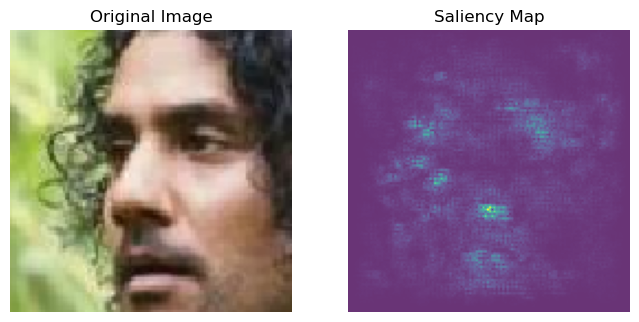

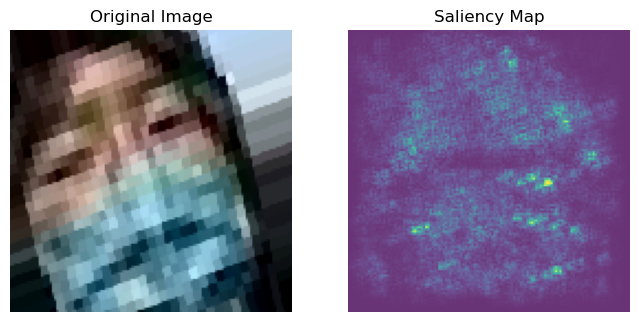

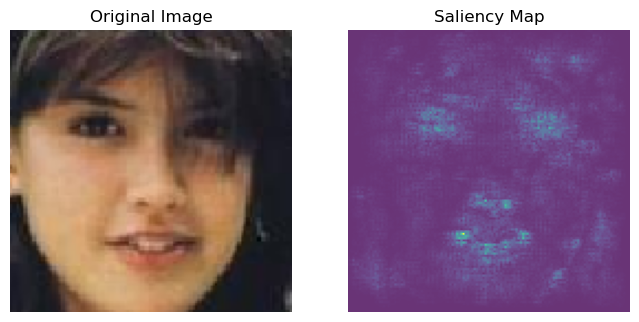

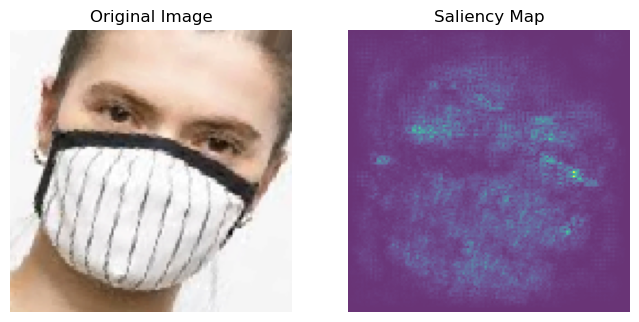

In [17]:
import numpy as np
import tensorflow as tf

# Assuming you have already trained your model (using the previous code)

# Define a function to compute the saliency map
def compute_saliency_map(model, image):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Watch the input image
        tape.watch(image)

        # Get the model prediction
        prediction = model(image)

        # Extract the predicted class score
        predicted_class_score = prediction[:, 0]

    # Calculate the gradient of the predicted class score with respect to the input image
    gradient = tape.gradient(predicted_class_score, image)

    # Compute the saliency map
    saliency_map = tf.reduce_max(tf.abs(gradient), axis=-1)

    return saliency_map.numpy().squeeze()


# Choose an image from the test set
for i in range (0,10) :
  sample_index =i  # Replace with the index of the sample you want to visualize
  sample_image = test_data[sample_index]

# Compute the saliency map
  saliency_map = compute_saliency_map(model, sample_image)

# Normalize the saliency map for visualization
  saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())

# Plot the original image and the saliency map
  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  plt.imshow(sample_image)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(saliency_map, cmap='viridis', alpha=0.8)
  plt.title('Saliency Map')
  plt.axis('off')

  # Display the plot
  plt.show()

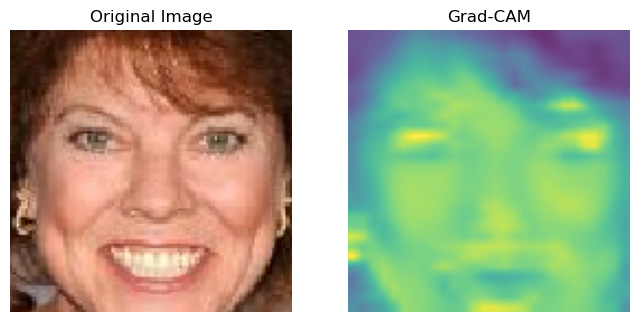

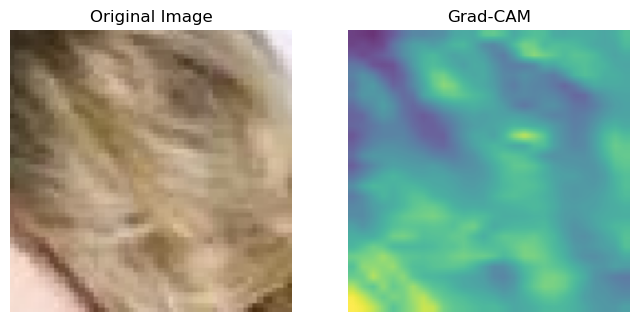

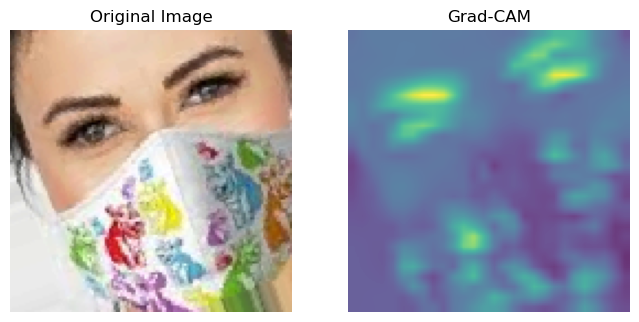

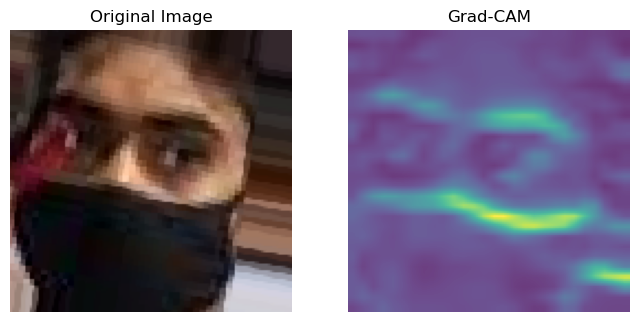

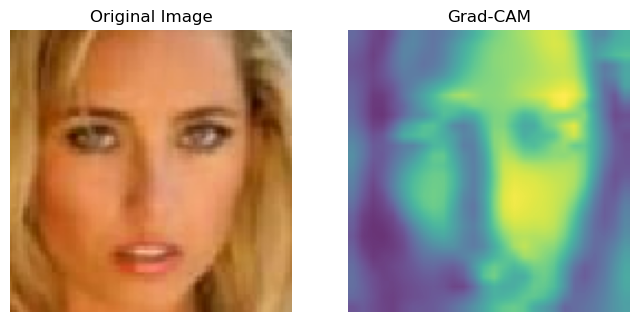

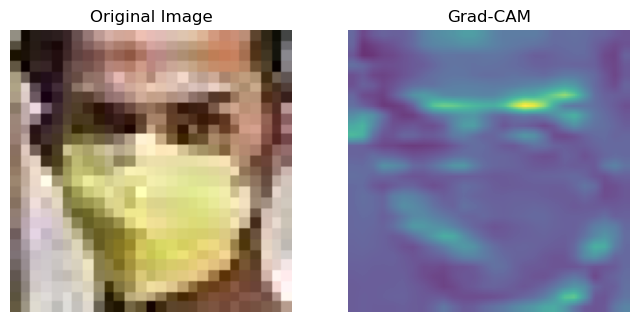

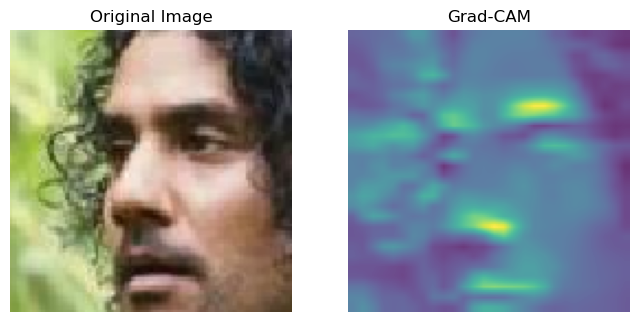

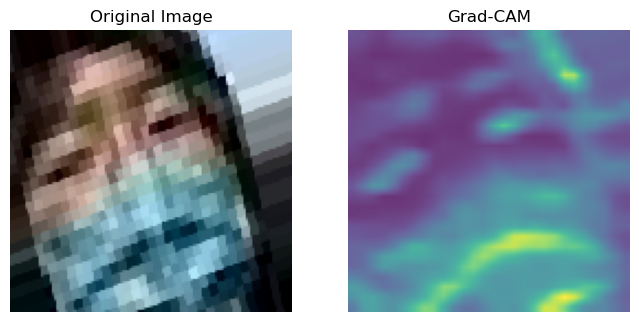

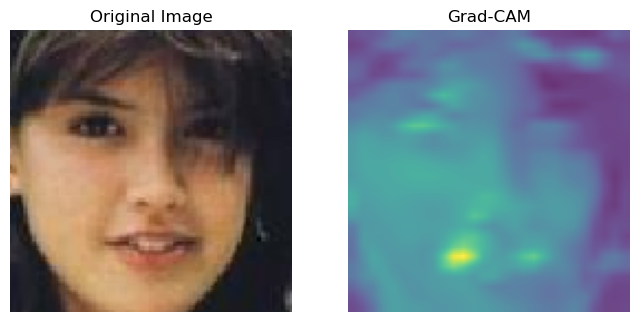

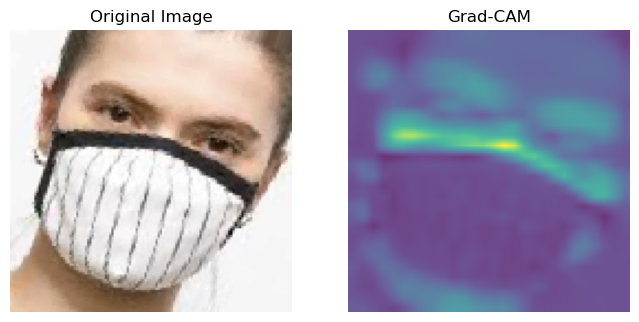

In [18]:
import cv2
import numpy as np

# Assuming you have already trained your model (using the previous code)

# Define a function to compute Grad-CAM
def compute_grad_cam(model, img_array, layer_name='conv2d_2'):
    img_array = np.expand_dims(img_array, axis=0)
    
    # Get the last convolutional layer
    last_conv_layer = model.get_layer(layer_name)
    
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = models.Model([model.inputs], [last_conv_layer.output, model.output])

    # Get the gradients of the predicted class with respect to the activations in the last conv layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # Assuming binary classification, adjust if needed

    grads = tape.gradient(loss, conv_outputs)[0]

    # Compute the guided gradients
    guided_grads = tf.cast(conv_outputs > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    # Compute the average of the gradients along each feature map
    weights = tf.reduce_mean(guided_grads, axis=(1, 2))

    # Compute the weighted sum of the activations in the last conv layer
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs[0]), axis=-1)

    # Apply ReLU to the CAM to keep only positive values
    cam = np.maximum(cam, 0)

    # Normalize the CAM
    cam /= np.max(cam)

    # Resize the CAM to match the original image size
    cam = cv2.resize(cam, (img_array.shape[2], img_array.shape[1]))

    return cam

# Choose an image from the test set
for i in range (0,10) :
    sample_index = i  # Replace with the index of the sample you want to visualize
    sample_image = test_data[sample_index]

# Compute Grad-CAM
    grad_cam = compute_grad_cam(model, sample_image)

    # Plot the original image and Grad-CAM
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(grad_cam, cmap='viridis', alpha=0.8)
    plt.title('Grad-CAM')
    plt.axis('off')

# Display the plot
    plt.show()

In [19]:
pip install lime

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Assuming you have already trained your model (using the previous code)

# Choose an image from the test set
sample_index = 0  # Replace with the index of the sample you want to visualize
sample_image = test_data[sample_index]

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define the prediction function to be explained
def predict_function(images):
    return model.predict(images)

# Explain the prediction for the chosen image
explanation = explainer.explain_instance(sample_image, predict_function, top_labels=1, hide_color=0, num_samples=1000)



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 70ms/step


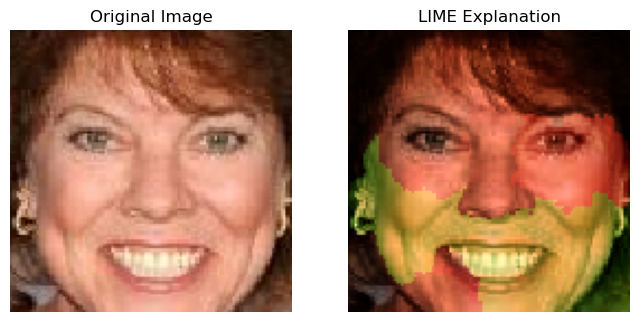

In [21]:
# Get the LIME mask
lime_mask, _ = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.imshow(sample_image)
ax1.set_title('Original Image')
ax1.axis('off')

lime_mask_rgb = np.zeros_like(sample_image)
lime_mask_rgb[:,:] = lime_mask
ax2.imshow(sample_image * lime_mask_rgb)
ax2.set_title('LIME Explanation')
ax2.axis('off')

# Display the plot
plt.show()